## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Walmart Data Set

In [2]:
#walmart_dataset_path= '/content/gdrive/My Drive/modelling-project-research-papers/walmart_store_forecasting/'
walmart_dataset_path= 'walmart-store-forecasting-dataset'


#load training dataset
df_train=pd.read_csv(walmart_dataset_path+'/train.csv')
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
#load testing dataset
df_test=pd.read_csv(walmart_dataset_path+'/test.csv')
df_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [4]:
#load store dataset
df_stores=pd.read_csv(walmart_dataset_path+'/stores.csv')
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
#load features dataset
df_features=pd.read_csv(walmart_dataset_path+'/features.csv')
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
#check null no. of values in training
df_train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [7]:
#check null no. of values in testing
df_test.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [8]:
#check null no. of values in store
df_stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [9]:
#check null no. of values in features
print(df_features.shape)
(df_features.isnull().sum()/len(df_features))*100

(8190, 12)


Store            0.000000
Date             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       50.769231
MarkDown2       64.334554
MarkDown3       55.885226
MarkDown4       57.704518
MarkDown5       50.549451
CPI              7.142857
Unemployment     7.142857
IsHoliday        0.000000
dtype: float64

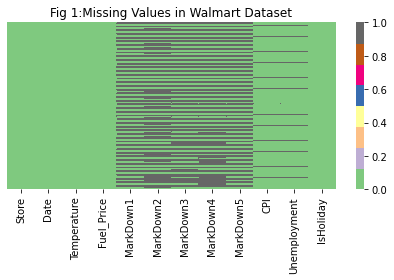

In [11]:
sns.heatmap(df_features.isnull(),yticklabels=False,cbar=True,cmap='Accent')
plt.title("Fig 1:Missing Values in Walmart Dataset")
plt.tight_layout()
#plt.savefig('/content/gdrive/My Drive/fig1',dpi=300)
plt.show()

## Rossmann Dataset

In [12]:
rossmann_dataset_path= 'rossmann-store-sales-dataset'

In [13]:
df_train=pd.read_csv(rossmann_dataset_path+'/train.csv',low_memory=False)
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [14]:
df_train[df_train.Open==0].Sales.unique()

array([0])

In [15]:
df_test=pd.read_csv(rossmann_dataset_path+'/test.csv')
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [16]:
print(df_test[df_test.Open==0].shape)
print(df_test[df_test.Open==1].shape)

(5984, 8)
(35093, 8)


In [17]:
df_store=pd.read_csv(rossmann_dataset_path+'/store.csv')
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [18]:
print(df_store[df_store.Promo2==1].shape)
print(df_store[df_store.Promo2==0].shape)

(571, 10)
(544, 10)


In [19]:
print(",".join(df_store.columns.tolist()))
print(df_store.shape)

Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
(1115, 10)


In [20]:
(df_train.isnull().sum()/len(df_train))*100

Store            0.0
DayOfWeek        0.0
Date             0.0
Sales            0.0
Customers        0.0
Open             0.0
Promo            0.0
StateHoliday     0.0
SchoolHoliday    0.0
dtype: float64

In [21]:
(df_test.isnull().sum()/len(df_test))*100

Id               0.000000
Store            0.000000
DayOfWeek        0.000000
Date             0.000000
Open             0.026772
Promo            0.000000
StateHoliday     0.000000
SchoolHoliday    0.000000
dtype: float64

In [22]:
(df_store.isnull().sum()/len(df_store))*100

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

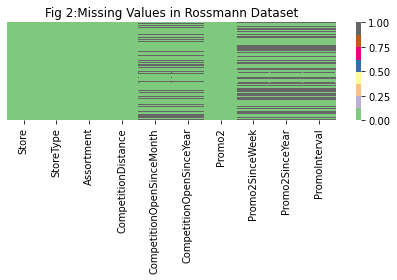

In [23]:
sns.heatmap(df_store.isnull(),yticklabels=False,cbar=True,cmap='Accent')
plt.title("Fig 2:Missing Values in Rossmann Dataset")
plt.tight_layout()
#plt.savefig('/content/gdrive/My Drive/fig2',dpi=300)
plt.show()